# Predict Sex using Height as a reference

In [1]:
import pandas as pd
import numpy as np

In [117]:
df = pd.read_csv("D:\\DataSet\\weight-height.csv")

In [118]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [121]:
df.shape

(10000, 3)

## Data Cleaning

In [122]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [123]:
# assigning all the columns
columns = list(df)

In [124]:
(df[columns[1:4]] == 0).sum()

Height    0
Weight    0
dtype: int64

In [125]:
df.shape

(10000, 3)

In [126]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.shape[0]

In [127]:
num_duplicate_rows

0

In [128]:
if num_duplicate_rows > 0:
    print(f"{num_duplicate_rows} duplicate rows found.")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [130]:
(df['Gender'] == "Male").sum()

5000

In [131]:
(df["Gender"] == "Female").sum()

5000

Since the number of Male and Female present in the test is equal, so we can consider this datset a balance dataset.

## Exporatory Data Analysis

In [132]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [134]:
df[df['Gender'] == 'Female']['Height'].mean()

63.70877360342507

In [135]:
df[df['Gender']=='Male']['Height'].mean()

69.02634590621741

In [136]:
columns[1:3]

['Height', 'Weight']

In [139]:
result = {}
Sex = list(df['Gender'].unique())
Metric = columns[1:3]
for sex in Sex:
    result[sex] = {}
    for metric in Metric:
        subset = df[df['Gender'] == sex][metric]
        result[sex][f'Average {metric}'] = subset.mean()
        result[sex][f'Standard Deviation {metric}'] = subset.std()
        result[sex][f'Median {metric}'] = subset.median()
    

In [140]:
for sex, metric in result.items():
    print(f' {sex} Statistics:')
    for metric, value in metric.items():
        print(f'{metric}:{value}')
        print('\n')

 Male Statistics:
Average Height:69.02634590621741


Standard Deviation Height:2.863362228660651


Median Height:69.02770850939555


Average Weight:187.0206206581932


Standard Deviation Weight:19.781154516763813


Median Weight:187.033546088862


 Female Statistics:
Average Height:63.70877360342507


Standard Deviation Height:2.696284015765055


Median Height:63.730923859147495


Average Weight:135.86009300746835


Standard Deviation Weight:19.02246780531901


Median Weight:136.11758297008498




In [143]:
df.groupby('Gender')['Height'].agg(['mean', 'std']).reset_index()

,Gender,mean,std
0,Female,63.708774,2.696284
1,Male,69.026346,2.863362


In [145]:
df.groupby('Gender').agg({
    'Height': ['mean', 'std'],
    'Weight': ['mean', 'std']
})

Height                Weight           
             mean       std        mean        std
Gender                                            
Female  63.708774  2.696284  135.860093  19.022468
Male    69.026346  2.863362  187.020621  19.781155

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


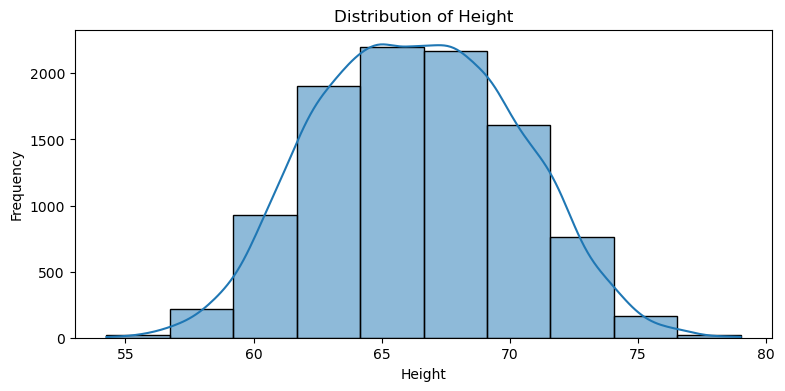

In [147]:
# Histogram of Weight
plt.figure( figsize = (9,4))
sns.histplot(df['Height'],kde = True, bins = 10)
plt.title('Distribution of Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


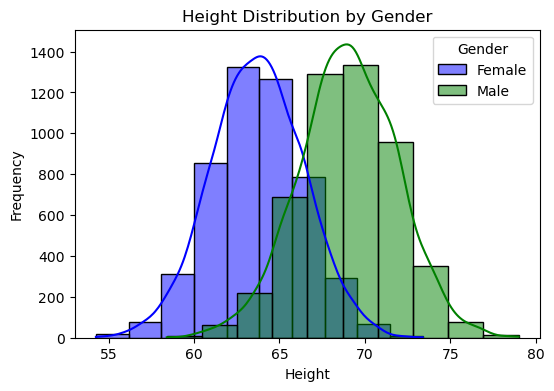

In [177]:
# Set up the figure and axis
plt.figure(figsize=(6,4))

# Plot histogram for Female
sns.histplot(df[df['Gender'] == 'Female']['Height'], kde=True, bins=10, color='blue', label='Female')

# Plot histogram for Male
sns.histplot(df[df['Gender'] == 'Male']['Height'], kde=True, bins=10, color='green', label='Male')

# Set title and labels
plt.title('Height Distribution by Gender')
plt.xlabel('Height')
plt.ylabel('Frequency')

# Display legend
plt.legend(title='Gender')

# Show plot
plt.show()


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


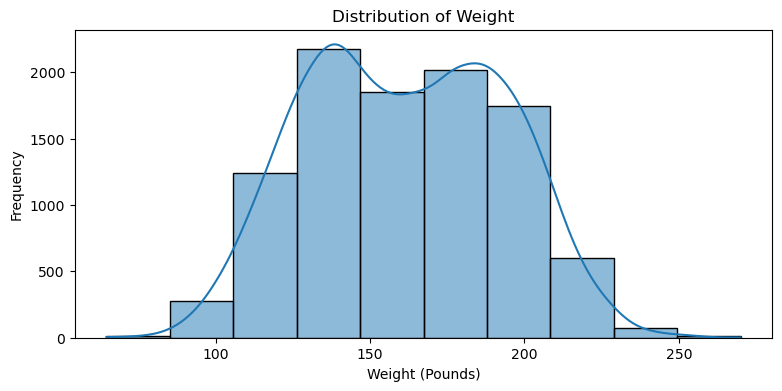

In [148]:
# Histogram of Weight
plt.figure(figsize = (9,4))
sns.histplot(df['Weight'], kde = True, bins = 10)
plt.title('Distribution of Weight')
plt.xlabel('Weight (Pounds)')
plt.ylabel('Frequency')
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


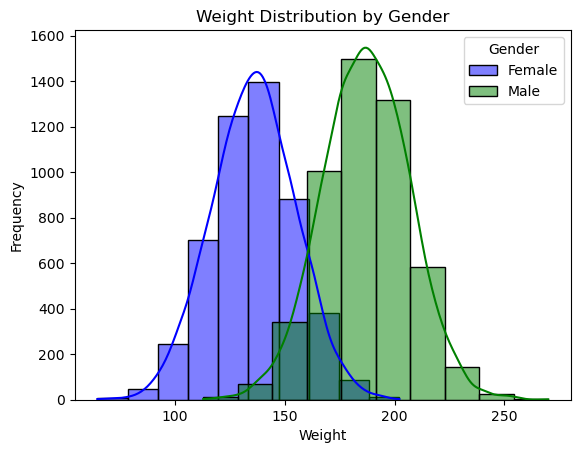

In [182]:
# Set up the figure and axis
#plt.figure(figsize=(6, 4))

# Plot histogram for Female
sns.histplot(df[df['Gender'] == 'Female']['Weight'], kde=True, bins=10, color='blue', label='Female')

# Plot histogram for Male
sns.histplot(df[df['Gender'] == 'Male']['Weight'], kde=True, bins=10, color='green', label='Male')

# Set title and labels
plt.title('Weight Distribution by Gender')
plt.xlabel('Weight')
plt.ylabel('Frequency')

# Display legend
plt.legend(title='Gender')

# Show plot
plt.show()


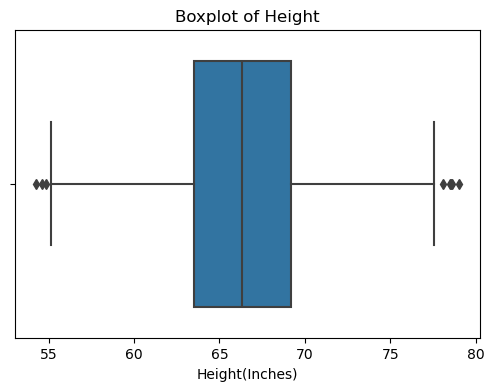

In [180]:
# Create a boxplot
plt.figure(figsize = (6,4))
sns.boxplot(x = df['Height'])
plt.title('Boxplot of Height')
plt.xlabel('Height(Inches)')
plt.show()

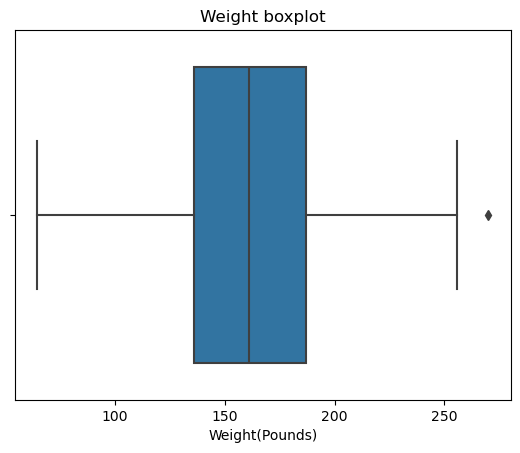

In [181]:
#plt.figure(figsize = (6,4))
sns.boxplot(x = df['Weight'])
plt.title('Weight boxplot')
plt.xlabel('Weight(Pounds)')
plt.show()

#### Since the target varible is categorical, Pearson's coefficient might not be an appropriate measure. Instead using Chi-squared test is more suitable


In [151]:
import scipy.stats as stats

In [152]:
# Calculate Chi-squared values between categorical target 'sex' and features 'height' and 'weight'
chi2_values = {}
for feature in ['Height', 'Weight']:
    cross_tab = pd.crosstab(df[feature], df['Gender'])
    chi2, p, _, _ = stats.chi2_contingency(cross_tab)
    chi2_values[feature] = chi2

In [153]:
# Display Chi-squared values
print("Chi-squared values:")
for feature, chi2 in chi2_values.items():
    print(f"{feature}: {chi2}")

Chi-squared values:
Height: 10000.0
Weight: 10000.0


The higher the Chi-squared value, the stronger the association between the two categorical variables. A Chi-squared value close to zero suggests that the variables are independent, meaning one does not provide information about the other.
Both Height and Weight have relatively high Chi-squared values, indicating a strong association with the Sex variable.

## Seperate Train and Test dataset

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
# Seperate Features and Target Dataset
X = df[['Height','Weight']]
y = df[['Gender']]

In [191]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# random_state=42: By setting a seed, the split is deterministic, meaning the same split will be generated every time you run the code.

## Building a Model

In [192]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Fit the model
model.fit(X_train, y_train)


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [193]:
y_pred = model.predict(X_test)

In [194]:
print(y_pred)

['Male' 'Male' 'Male' ... 'Female' 'Male' 'Female']


### Checking the model performance

In [198]:
from sklearn.metrics import accuracy_score, confusion_matrix
# print Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.924


In [201]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[901  87]
 [ 65 947]]


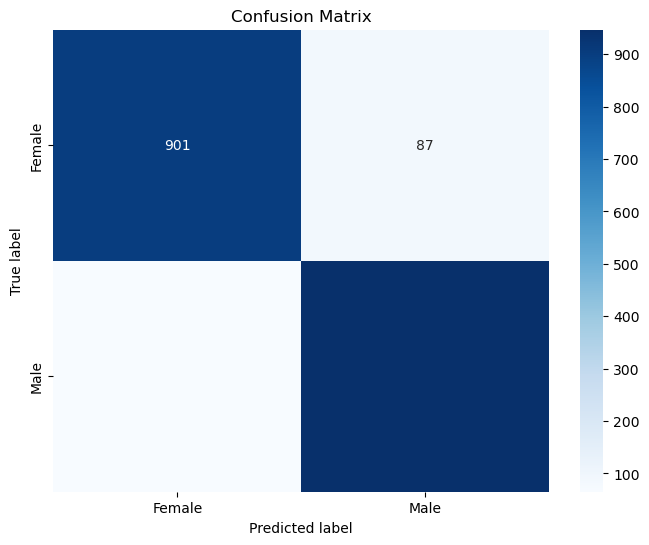

In [202]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [203]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Female', 'Male'])

# Print the classification report
print(report)


              precision    recall  f1-score   support

      Female       0.93      0.91      0.92       988
        Male       0.92      0.94      0.93      1012

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



### Predict a sample entry

In [220]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [223]:
sample_height = float(input("Enter the height: "))
sample_weight = float(input("Enter the weight: "))

# Predict sex using the trained model
predicted_sex = model.predict([[sample_height, sample_weight]])

print(f"Predicted sex based on height {sample_height} cm and weight {sample_weight} kg is: {predicted_sex}")

Enter the height:  68
Enter the weight:  162


Predicted sex based on height 68.0 cm and weight 162.0 kg is: ['Female']


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
